<a href="https://colab.research.google.com/github/HilbertN/Analisis_de_datos_Tareas/blob/main/Tarea4_RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy,MeanSquaredError
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np
import shutil 
import os
import matplotlib.pyplot as plt

In [262]:
# Weights & Biases  (optional)
!pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [263]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
#Ejercicio 1: Entrena una red neuronal para que reproduzca la siguientes funciones en el  intervalo  de  [-1,1].  
# Graficar  la  solución  de  la  red  en  conjunto  con  la gráfica de la función.(a)  3 sin(πx)(b)  1 + 2x+ 4x3

#Ejercicio 1(a): 
#Vamos a proponer los siguientes arreglos como conjuntos de entranmiento y de prueba 

x_train = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_train = 3 * np.sin(np.pi * x_train)

#Eliminamos elementos repetidos entre el conjunto de entrenamiento y de prueba
v=np.linspace(-1, 1, 100)
cond=np.isin(np.linspace(-1, 1, 100),np.linspace(-1, 1, 1000))
v=v[np.where(~cond)]

x_test = v.reshape(-1, 1)
y_test= 3 * np.sin(np.pi * x_test)


In [ ]:
#No hay elementos repetidos entre el conjunto de prueba y entrenamiento
h1=set(np.linspace(-1, 1, 1000))
h3=set(v)
Repetidos=list(h3.intersection(h1))
Repetidos

[]

In [ ]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(1,)))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))




In [ ]:
batch_size=30 
epochs=40 
learning_rate=0.03
Optimizador=SGD

In [ ]:
model.compile(loss='mean_squared_error', optimizer=Optimizador(learning_rate=learning_rate), metrics=['mse'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/40
34/34 [==============================] - 1s 6ms/step - loss: 2.0524 - mse: 2.0524 - val_loss: 1.0705 - val_mse: 1.0705
Epoch 2/40
34/34 [==============================] - 0s 3ms/step - loss: 1.0675 - mse: 1.0675 - val_loss: 0.9842 - val_mse: 0.9842
Epoch 3/40
34/34 [==============================] - 0s 3ms/step - loss: 0.9878 - mse: 0.9878 - val_loss: 0.8358 - val_mse: 0.8358
Epoch 4/40
34/34 [==============================] - 0s 3ms/step - loss: 0.8854 - mse: 0.8854 - val_loss: 0.7953 - val_mse: 0.7953
Epoch 5/40
34/34 [==============================] - 0s 4ms/step - loss: 0.7543 - mse: 0.7543 - val_loss: 0.6106 - val_mse: 0.6106
Epoch 6/40
34/34 [==============================] - 0s 4ms/step - loss: 0.6164 - mse: 0.6164 - val_loss: 0.4887 - val_mse: 0.4887
Epoch 7/40
34/34 [==============================] - 0s 5ms/step - loss: 0.4632 - mse: 0.4632 - val_loss: 0.3367 - val_mse: 0.3367
Epoch 8/40
34/34 [==============================] - 0s 4ms/step - loss: 0.3329 - mse: 0.33

4/4 [==============================] - 0s 2ms/step


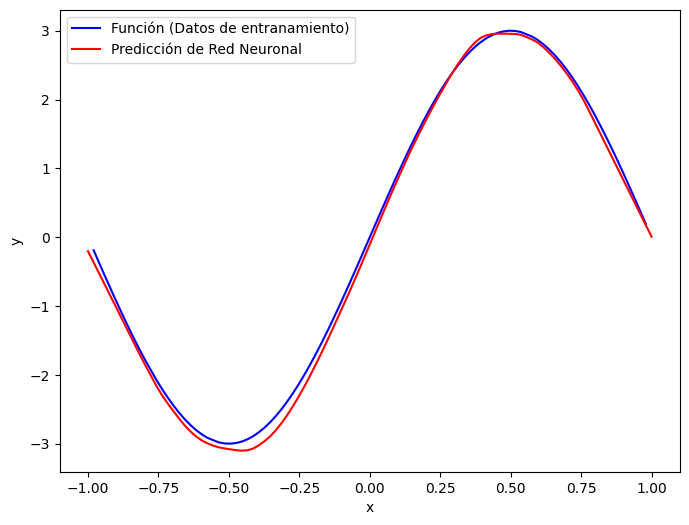

In [ ]:
x_pred = np.linspace(-1, 1, 100).reshape(-1, 1)
y_pred = model.predict(x_pred)


plt.figure(figsize=(8, 6))
plt.plot(x_test, y_test, color='blue', label='Función (Datos de entranamiento)')
plt.plot(x_pred, y_pred, color='red', label='Predicción de Red Neuronal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

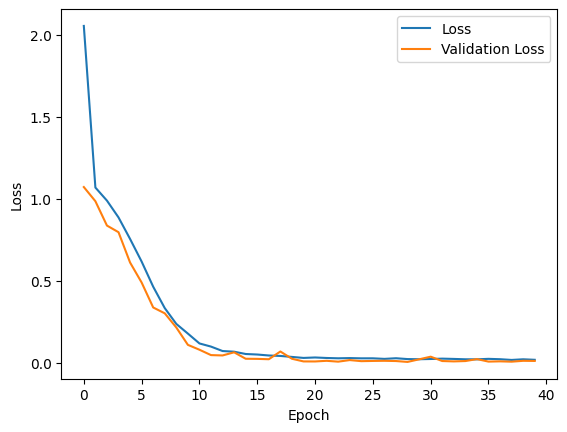

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [312]:
#Ejercicio 1(b): 
#Vamos a proponer los siguientes arreglos como conjuntos de entranmiento y de prueba 

x_train = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_train = 1+2*x_train+4*np.power(x_train,3.)

#Eliminamos elementos repetidos entre el conjunto de entrenamiento y de prueba
v=np.linspace(-1, 1, 100)
cond=np.isin(np.linspace(-1, 1, 100),np.linspace(-1, 1, 1000))
v=v[np.where(~cond)]

x_test = v.reshape(-1, 1)
y_test = 1+2*x_test+4*np.power(x_test,3.)


In [322]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(1,)))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))



In [323]:
batch_size=20 
epochs=30
learning_rate=0.01
Optimizador=SGD
import wandb
from wandb.keras import WandbCallback
wandb.init(project="Red_Neuronal_Ejercicio1b")
wandb.config.learning_rate = learning_rate
wandb.config.epochs = epochs
wandb.config.batch_size = batch_size
wandb.config.optimizador=Optimizador

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mse,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mse,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,29
best_val_loss,0.27058
epoch,29
loss,0.35826
mse,0.35826
val_loss,0.29383


In [324]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=learning_rate), metrics=['mse'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test),callbacks=[WandbCallback()])

Epoch 1/30
 1/50 [..............................] - ETA: 16s - loss: 11.2409 - mse: 11.2409

27/50 [===============>..............] - ETA: 0s - loss: 5.8466 - mse: 5.8466   

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 19ms/step - loss: 3.9740 - mse: 3.9740 - val_loss: 1.0396 - val_mse: 1.0396
Epoch 2/30
25/50 [==============>...............] - ETA: 0s - loss: 0.9513 - mse: 0.9513

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 20ms/step - loss: 0.8744 - mse: 0.8744 - val_loss: 0.5724 - val_mse: 0.5724
Epoch 3/30
38/50 [=====================>........] - ETA: 0s - loss: 0.6395 - mse: 0.6395

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 22ms/step - loss: 0.6131 - mse: 0.6131 - val_loss: 0.4334 - val_mse: 0.4334
Epoch 4/30
48/50 [===========================>..] - ETA: 0s - loss: 0.4869 - mse: 0.4869

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 22ms/step - loss: 0.4843 - mse: 0.4843 - val_loss: 0.3462 - val_mse: 0.3462
Epoch 5/30
48/50 [===========================>..] - ETA: 0s - loss: 0.4263 - mse: 0.4263

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 22ms/step - loss: 0.4242 - mse: 0.4242 - val_loss: 0.2853 - val_mse: 0.2853
Epoch 6/30
24/50 [=============>................] - ETA: 0s - loss: 0.4015 - mse: 0.4015

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.3766 - mse: 0.3766 - val_loss: 0.2447 - val_mse: 0.2447
Epoch 7/30
28/50 [===============>..............] - ETA: 0s - loss: 0.3464 - mse: 0.3464

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 27ms/step - loss: 0.3371 - mse: 0.3371 - val_loss: 0.2095 - val_mse: 0.2095
Epoch 8/30
28/50 [===============>..............] - ETA: 0s - loss: 0.2823 - mse: 0.2823

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.2901 - mse: 0.2901 - val_loss: 0.1792 - val_mse: 0.1792
Epoch 9/30
25/50 [==============>...............] - ETA: 0s - loss: 0.2438 - mse: 0.2438

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.2655 - mse: 0.2655 - val_loss: 0.1529 - val_mse: 0.1529
Epoch 10/30
30/50 [=================>............] - ETA: 0s - loss: 0.2247 - mse: 0.2247

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.2332 - mse: 0.2332 - val_loss: 0.1348 - val_mse: 0.1348
Epoch 11/30
42/50 [========================>.....] - ETA: 0s - loss: 0.2189 - mse: 0.2189

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.2129 - mse: 0.2129 - val_loss: 0.1097 - val_mse: 0.1097
Epoch 12/30
32/50 [==================>...........] - ETA: 0s - loss: 0.1655 - mse: 0.1655

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 16ms/step - loss: 0.1754 - mse: 0.1754 - val_loss: 0.0939 - val_mse: 0.0939
Epoch 13/30
29/50 [================>.............] - ETA: 0s - loss: 0.1738 - mse: 0.1738

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.1683 - mse: 0.1683 - val_loss: 0.0869 - val_mse: 0.0869
Epoch 14/30
30/50 [=================>............] - ETA: 0s - loss: 0.1312 - mse: 0.1312

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 16ms/step - loss: 0.1436 - mse: 0.1436 - val_loss: 0.0708 - val_mse: 0.0708
Epoch 15/30
43/50 [========================>.....] - ETA: 0s - loss: 0.1239 - mse: 0.1239

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.1237 - mse: 0.1237 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 16/30
47/50 [===========================>..] - ETA: 0s - loss: 0.1106 - mse: 0.1106

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 16ms/step - loss: 0.1098 - mse: 0.1098 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 17/30
50/50 [==============================] - ETA: 0s - loss: 0.1006 - mse: 0.1006

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 22ms/step - loss: 0.1006 - mse: 0.1006 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 18/30
49/50 [============================>.] - ETA: 0s - loss: 0.0948 - mse: 0.0948

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 22ms/step - loss: 0.0941 - mse: 0.0941 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 19/30
50/50 [==============================] - 0s 6ms/step - loss: 0.0913 - mse: 0.0913 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 20/30
50/50 [==============================] - ETA: 0s - loss: 0.0820 - mse: 0.0820

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 2s 32ms/step - loss: 0.0820 - mse: 0.0820 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 21/30
50/50 [==============================] - 0s 3ms/step - loss: 0.0778 - mse: 0.0778 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 22/30
30/50 [=================>............] - ETA: 0s - loss: 0.0749 - mse: 0.0749

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.0736 - mse: 0.0736 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 23/30
27/50 [===============>..............] - ETA: 0s - loss: 0.0732 - mse: 0.0732

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 24/30
50/50 [==============================] - 0s 3ms/step - loss: 0.0727 - mse: 0.0727 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 25/30
28/50 [===============>..............] - ETA: 0s - loss: 0.0673 - mse: 0.0673

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.0656 - mse: 0.0656 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 26/30
50/50 [==============================] - ETA: 0s - loss: 0.0617 - mse: 0.0617

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 18ms/step - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 27/30
50/50 [==============================] - 0s 3ms/step - loss: 0.0649 - mse: 0.0649 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 28/30
46/50 [==========================>...] - ETA: 0s - loss: 0.0593 - mse: 0.0593

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 29/30
24/50 [=============>................] - ETA: 0s - loss: 0.0549 - mse: 0.0549

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 30/30
29/50 [================>.............] - ETA: 0s - loss: 0.0555 - mse: 0.0555

wandb: Adding directory to artifact (/content/wandb/run-20230527_230331-t4psuwcg/files/model-best)... Done. 0.0s


50/50 [==============================] - 1s 17ms/step - loss: 0.0551 - mse: 0.0551 - val_loss: 0.0134 - val_mse: 0.0134


4/4 [==============================] - 0s 2ms/step


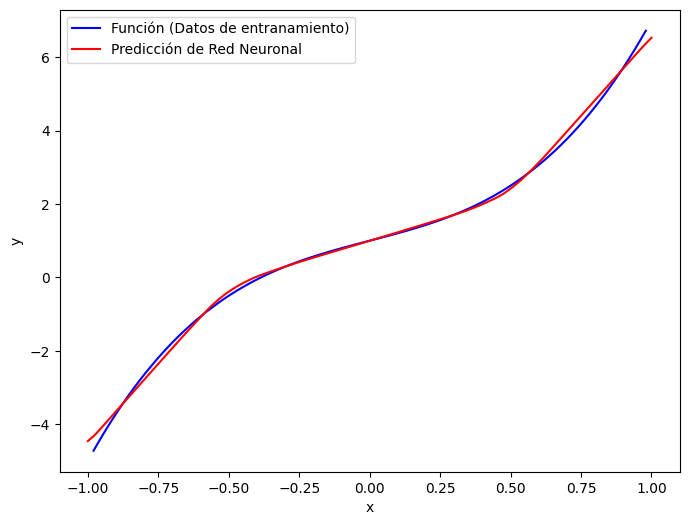

In [325]:
x_pred = np.linspace(-1, 1, 100).reshape(-1, 1)
y_pred = model.predict(x_pred)

plt.figure(figsize=(8, 6))
plt.plot(x_test, y_test, color='blue', label='Función (Datos de entranamiento)')
plt.plot(x_pred, y_pred, color='red', label='Predicción de Red Neuronal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

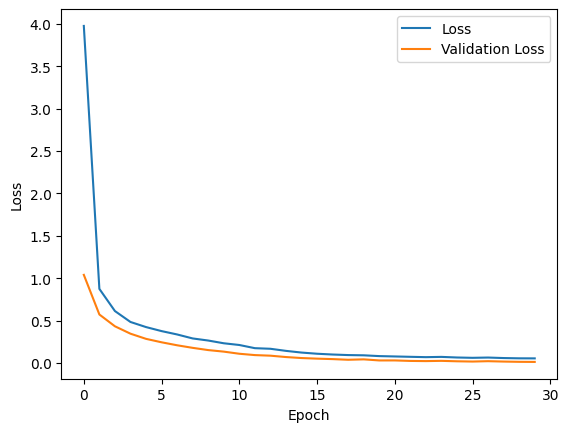

In [326]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Ejercicio dos: Identificar enfermedades en plantas 


In [ ]:
#Para leer datos desde Google Drive: 
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Base de datos/train.csv', names=['Nombre', 'Clase'])

In [ ]:
df=df.drop(0,axis=0)#Eliminamos la primera fila que no es d eutilidad

In [ ]:
df.Clase.unique()#Checamos las etiquetas de las clases

array(['healthy', 'scab frog_eye_leaf_spot complex', 'scab', 'complex',
       'rust', 'frog_eye_leaf_spot', 'powdery_mildew',
       'scab frog_eye_leaf_spot', 'frog_eye_leaf_spot complex',
       'rust frog_eye_leaf_spot', 'powdery_mildew complex',
       'rust complex'], dtype=object)

In [ ]:
df[df['Clase']=='healthy']['Nombre'].size

4624

In [ ]:
for x in list(df.Clase.unique()): 
  y=df[df['Clase']==x]['Nombre'].size
  print(f'{x}={y}')

healthy=4624
scab frog_eye_leaf_spot complex=200
scab=4826
complex=1602
rust=1860
frog_eye_leaf_spot=3181
powdery_mildew=1184
scab frog_eye_leaf_spot=686
frog_eye_leaf_spot complex=165
rust frog_eye_leaf_spot=120
powdery_mildew complex=87
rust complex=97


In [ ]:
df.shape

(18632, 2)

In [ ]:
#Vamos a mezclar de manera aleatoria todas las filas del csv
#df= df.sample(frac=1, random_state=42)
#Vamos a dividir a la mitad la base de datos para la primera parte para imagenes de entrenamiento y la otra por prueba
#df1=df.iloc[0:9316,:]
#df2=df.iloc[9316:18633,:]

In [ ]:
#Podemos notar que los conjuntos no tienen elementos en común 
#set(df1.Nombre).intersection(set(df2.Nombre))

In [ ]:
# Ruta de la carpeta de destino para las subcarpetas
mini_train = '/content/train_'

# Crear la carpeta de destino si no existe
if not os.path.exists(mini_train ):
    os.makedirs(mini_train )

In [ ]:
#Formamos una lista ordenada de las categorias de que tenemos en nuestro csv
E= df.sort_values('Clase')
clases= list(E.Clase.unique())

In [ ]:
#El próposito de este for es formar carpetas de cada una de las clasificaciones en la carpeta llamada train_
#Cada carpeta consta de 50 imágenes con la finalidad de reducir el tiempo de aprendizaje de la red convolucional
for i in clases:
    contador = 0  # Contador de imágenes en la carpeta actual
    for c in list(df[df['Clase'] == i]['Nombre']):
        if contador >= 50:
            break  # Se alcanzó el límite de imágenes por carpeta
        imagen= os.path.join('/content/drive/MyDrive/Base de datos/train_images', c)
        if os.path.exists(imagen):
            mt= os.path.join(mini_train , 'train_' + i)
            if not os.path.exists(mt):
                os.makedirs(mt)
            m= shutil.copy(imagen,mt)
            contador+= 1



In [ ]:
l=list(os.listdir('/content/train_'))


In [ ]:
#Realizamos el mismo procedimiento para crear la carpeta con subcarpetas de las categorías del problema
#Esta vez para el conjunto de prueba 

# Ruta de la carpeta de destino para las subcarpetas
mini_test = '/content/test_'

# Crear la carpeta de destino si no existe
if not os.path.exists(mini_test):
    os.makedirs(mini_test )

In [ ]:
#Formamos una lista ordenada de las categorias de que tenemos en nuestro csv
#E= df2.sort_values('Clase')
#clases= list(E.Clase.unique())

In [ ]:
#El próposito de este for es formar carpetas de cada una de las clasificaciones en la carpeta llamada test_
#Cada carpeta consta de 5 imágenes,estamos considerado el 10% de las imagenes de entrenamiento.
for i in clases:
    contador = 0  # Contador de imágenes en la carpeta actual
    for c in list(df[df['Clase'] == i]['Nombre']):
        if contador >= 5:
            break  # Se alcanzó el límite de imágenes por carpeta
        imagen= os.path.join('/content/drive/MyDrive/Base de datos/train_images', c)
        if os.path.exists(imagen):
            mt= os.path.join(mini_test , 'test_' + i)
            if not os.path.exists(mt):
                os.makedirs(mt)
            m= shutil.copy(imagen,mt)
            contador+= 1


In [ ]:
ih,iw=150,150 #Tamaño de la imagen
input_shape=(ih,iw,3) #forma de la imagen : Largo, Ancho y colores
train_dir= '/content/train_' #directorio de entrenamiento
test_dir='/content/test_' #directorio de prueba 
num_class=12 #Número de clases
epochs=30 #Epocas
batch_size=5  #batch para hacer cada entrenamiento. Lee 5 'batch_size' imagenes antes de actualizar
num_train= 600 #Número de imágenes en train 
num_test=60 #Número de imágenes en test
epoch_steps= num_train//batch_size 
test_steps=num_test // batch_size

In [ ]:
gentrain = ImageDataGenerator(rescale=1. / 255.) #indica que reescale cada canal con valor entre 0 y 1.


train = gentrain.flow_from_directory(train_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='categorical')

gentest = ImageDataGenerator(rescale=1. / 255)

test = gentest.flow_from_directory(test_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='categorical')

Found 600 images belonging to 12 classes.
Found 60 images belonging to 12 classes.


In [ ]:
#shutil.rmtree('/content/train_') #Para eliminar una carpeta


In [ ]:
#shutil.rmtree('/content/test_') #Para eliminar una carpeta